## Data Cleaning & Exploration Activity

## 1. Data Cleaning

Poor data quality can have an adverse effect on data mining. Some common data quality issues include missing values, incorrectly formatted data, noise, outliers, and duplicate data. There could be many other data quality issues as well. Here, we will experiment with detecting and alleviating some of these data quality problems. 

### 1.1 Cleaning the CSV file
For this particular dataset, because it is quite small, some of the data cleaning can be done "by hand" in the csv file.

Open the csv file and take a look at it. Manually clean up some of the data. Things to consider:
* Make sure all of the numeric columns contain only numbers. Check the 'Age', 'Miles from Austin', 'Number of shoes', and 'How much cash' columns. Make sure they are all in the same units. 

* Replace any missing or unknown values with a '?'.

* Save your cleaned data file as a .csv (this makes things easier than an .xlsx file).


### 1.2 Reading data from a CSV file
Read the cleaned csv file into a Pandas dataframe. You can find more on reading csv data in to a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

Documentation for Pandas DataFrames is [here](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

In [22]:
import pandas as pd
# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

data = pd.read_csv('Data Gathering Survey Student Analysis Report (7) cleaned.csv')

print("Shape = ", data.shape) #shows (number of rows, number of cols)
data.head()

Shape =  (106, 14)


,How old are you?,What year are you in school?,What is your major?,What is your hometown?,How many miles is your hometown from Austin?,How tall are you in inches?,What is your favorite color?,How many pairs of shoes do you own?,How many MINUTES did you spend exercising yesterday?,How many MINUTES did you spend on the computer yesterday?,How many HOURS did you sleep last night?,How many siblings do you have?,How much cash do you have on you right now?,Did you eat breakfast this morning?
0,21,Senior,Natural Sciences (& Math) / Geosciences,Houston,140.0,61,Pink,8,0,500,8,1,200,no
1,22,Senior,Natural Sciences (& Math) / Geosciences,"Brownsville, TX",300.0,61,green,14,0,40,7,2,0,no
2,23,Super Senior,Natural Sciences (& Math) / Geosciences,"Boling, Texas",145.0,71,Green,6,45,180,7,1,2,no
3,22,Senior,Natural Sciences (& Math) / Geosciences,"Fügen, Austria",5521.0,65,Black,15,70,0,5,2,0,no
4,23,Super Senior,Fine Arts / Architecture,Dallas,180.0,69'',Purple,6,0,240,7,1,0,Yes


### 1.3 Missing Values

The missing values should now be encoded as '?'. 

* First, convert the missing values to NaNs. 
* Then, display the number of missing values in each column of the data.

In [23]:
import numpy as np

'''
Note that 'replace' returns a NEW dataframe with the values replaced.
If you want it to replace the values in your current dataframe, you will
need to set inplace=True.
'''
data.replace('?', np.NaN, inplace=True)

print("\nTotal num missing values:", data.isnull().sum())


Total num missing values: How old are you?                                             0
What year are you in school?                                 0
What is your major?                                          0
What is your hometown?                                       0
How many miles is your hometown from Austin?                 1
How tall are you in inches?                                  0
What is your favorite color?                                 0
How many pairs of shoes do you own?                          2
How many MINUTES did you spend exercising yesterday?         0
How many MINUTES did you spend on the computer yesterday?    0
How many HOURS did you sleep last night?                     0
How many siblings do you have?                               0
How much cash do you have on you right now?                  0
Did you eat breakfast this morning?                          0
dtype: int64


### 1.4 Imputation

One option for handling missing values is to fill them in with a "reasonable" estimation. This is called **imputation**. Mean or median values are often used for imputation of numeric attributes. Mode could be used for categorical imputation. Or mabye there is another value that makes sense for the data, like 0. 

Replace any missing values in the age column with something reasonable.

You will need to convert the data from strings to numeric values first. This line of code is provided for you.

In [3]:
# convert the column into numeric values first
data['How many pairs of shoes do you own?'] = pd.to_numeric(data['How many pairs of shoes do you own?'])

mean = data['How many pairs of shoes do you own?'].mean()
print("mean=", mean)
med = data['How many pairs of shoes do you own?'].median()
print("median=", med)
mode = data['How many pairs of shoes do you own?'].mode()
print("mode=", mode)

# Could replace missing values with the mean, median, or the mode
'''
Just like 'replace', 'fillna' returns a NEW dataframe with the NA values replaced.
If you want it to replace the NA values in your current dataframe, you will
need to set inplace=True.
'''
data['How many pairs of shoes do you own?'].fillna(med, inplace=True)
data.head()

mean= 10.163461538461538
median= 7.0
mode= 0    6.0
dtype: float64


,How old are you?,What year are you in school?,What is your major?,What is your hometown?,How many miles is your hometown from Austin?,How tall are you in inches?,What is your favorite color?,How many pairs of shoes do you own?,How many MINUTES did you spend exercising yesterday?,How many MINUTES did you spend on the computer yesterday?,How many HOURS did you sleep last night?,How many siblings do you have?,How much cash do you have on you right now?,Did you eat breakfast this morning?
0,21,Senior,Natural Sciences (& Math) / Geosciences,Houston,140.0,61,Pink,8.0,0,500,8,1,200,no
1,22,Senior,Natural Sciences (& Math) / Geosciences,"Brownsville, TX",300.0,61,green,14.0,0,40,7,2,0,no
2,23,Super Senior,Natural Sciences (& Math) / Geosciences,"Boling, Texas",145.0,71,Green,6.0,45,180,7,1,2,no
3,22,Senior,Natural Sciences (& Math) / Geosciences,"Fügen, Austria",5521.0,65,Black,15.0,70,0,5,2,0,no
4,23,Super Senior,Fine Arts / Architecture,Dallas,180.0,69'',Purple,6.0,0,~240,7,1,0,Yes


## 2. Exploratory Data Analysis (EDA)
An important first step to every data analysis project is to explore your data. You need to have a good understanding of what is in your data. What are the ranges & distributions of the values, do you have any extreme values, are there any correlations between any of the features, etc. You just want to know and understand what you are working with.

### 2.1 Univariate Analysis: Explore the age feature
* Display some measures of central tendency for age
* Display some measures of dispersion for age
* Show a distribution of this feature with either a plot or a table.
* Are there any outliers? Show this with a plot.

In [24]:
# convert the column into numeric values first
data['How old are you?'] = pd.to_numeric(data['How old are you?'])
print(data['How old are you?'].describe())
print()
print("range:", data['How old are you?'].max() - data['How old are you?'].min())
print("median:", data['How old are you?'].median())


count    106.000000
mean      21.358491
std        0.937968
min       20.000000
25%       21.000000
50%       21.000000
75%       22.000000
max       24.000000
Name: How old are you?, dtype: float64

range: 4
median: 21.0


In [6]:
# distribution in table form
data['How old are you?'].value_counts()

21    46
22    30
20    18
23    10
24     2
Name: How old are you?, dtype: int64

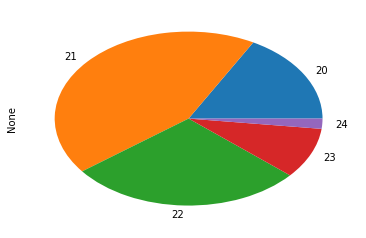

In [7]:
# distribution as a pie chart
groups = data.groupby('How old are you?')
groups.size().plot.pie()

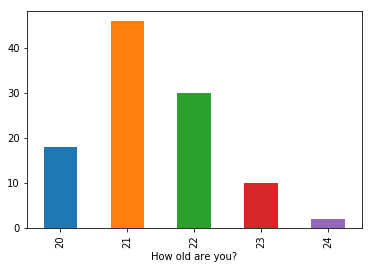

In [8]:
# distribution as a bar chart
groups = data.groupby('How old are you?')
groups.size().plot.bar()

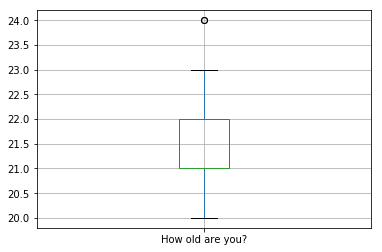

In [9]:
# show outliers with a boxplot
data.boxplot(['How old are you?'])

### 2.2 Bivariate Analysis: Correlate two features
I suspect there may be a negative correlation between time spent on the computer and time spent exercising (the more time you spend on the computer, the less time you spend excercising). Let's examine the data to see if this is the case...

Create a plot of computer time vs exercise time to see if you can visually see a correlation. Does there appear to be a correlation? Do there appear to be any bivariate outliers?

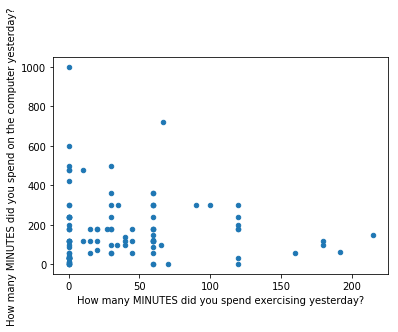

In [27]:
data.plot.scatter('How many MINUTES did you spend exercising yesterday?',
                  'How many MINUTES did you spend on the computer yesterday?')

### 2.3 Keep Exploring...
Continue to explore the data. See if you can find anything interesting!

In [ ]:
'''
Things you could try:

- Pie chart or bar chart of majors, or favorite colors

- Distribution of 'miles from home', or height, or num shoes, or cash, etc.
- Any outliers? How much do outliers skew the mean?

- Correlation between cash & num shoes
- Correlation between amt of sleep & eating breakfast
- Correlation between amt of sleep & computer time

'''

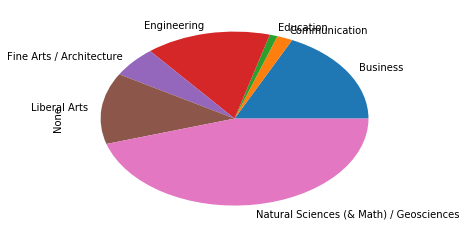

In [11]:
# majors as a pie chart
groups = data.groupby('What is your major?')
groups.size().plot.pie()

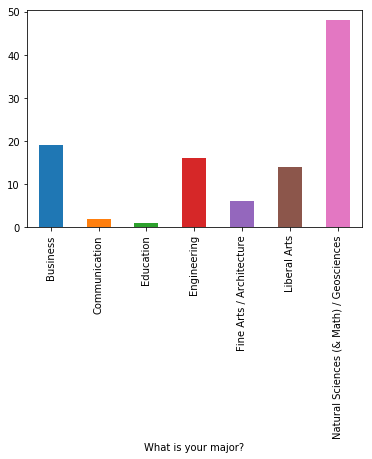

In [12]:
# majors as a bar chart
groups = data.groupby('What is your major?')
groups.size().plot.bar()

In [13]:
# majors by count
data['What is your major?'].value_counts()

Natural Sciences (& Math) / Geosciences    48
Business                                   19
Engineering                                16
Liberal Arts                               14
Fine Arts / Architecture                    6
Communication                               2
Education                                   1
Name: What is your major?, dtype: int64

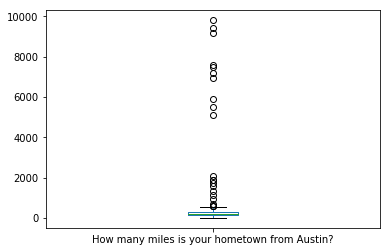

In [14]:
# boxplot of 'miles from home'
data['How many miles is your hometown from Austin?'] = pd.to_numeric(data['How many miles is your hometown from Austin?'])
data['How many miles is your hometown from Austin?'].plot(kind="box")

In [35]:
# there are too many unique values, so
# put distance from home into bins
bins = [-1, 1, 50, 100, 500, 2500, 10000]
binned = pd.cut(data['How many miles is your hometown from Austin?'], bins)

# sort=False keeps things ordered by bins, rather than ordering by highest count to lowest count
counts = binned.value_counts(sort=False)
counts

(-1, 1]          11
(1, 50]           5
(50, 100]         7
(100, 500]       59
(500, 2500]      13
(2500, 10000]    10
Name: How many miles is your hometown from Austin?, dtype: int64

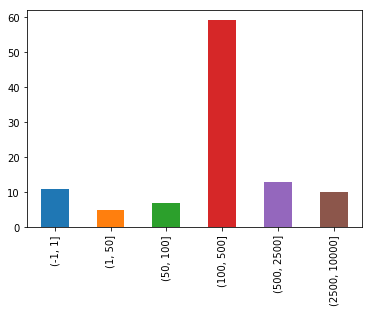

In [36]:
# bar chart of how far people are from their hometown
counts.plot(kind='bar')